In [1]:
import numpy as np
import pandas as pd

In [5]:
df1 = pd.DataFrame(np.arange(8).reshape(2,4), index=pd.Index(['LA', 'SF'], name = 'city'),
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'letter'))

# Stack Unstack

In [6]:
df1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [12]:
df2 = df1.stack()
df2

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [10]:
df2.unstack('letter')

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [13]:
df2.unstack('city')

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


# Pivot

In [24]:
fl = pd.read_table('1.txt', sep=',')
fl

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [34]:
fl_p = fl.pivot( 'month', 'year')
fl_p 

passengers                                                       
year            1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                      
April            129  135  163  181  235  227  269  313  348  348  396  461
August           148  170  199  242  272  293  347  405  467  505  559  606
December         118  140  166  194  201  229  278  306  336  337  405  432
February         118  126  150  180  196  188  233  277  301  318  342  391
January          112  115  145  171  196  204  242  284  315  340  360  417
July             148  170  199  230  264  302  364  413  465  491  548  622
June             135  149  178  218  243  264  315  374  422  435  472  535
March            132  141  178  193  236  235  267  317  356  362  406  419
May              121  125  172  183  229  234  270  318  355  363  420  472
November         104  114  146  172  180  203  237  271  305  310  362  390
October          119  133  162  191  211  229  274  306  347  359  407  461
September        136  158  184  209  237  259  312  355  404  404  463  508

In [35]:
#Making index all small cases
fl_p.index = fl_p.index.map(str.lower)

In [37]:
#renamen index Capitalizae values
fl_p.rename(index = str.title)

passengers                                                       
year            1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                      
April            129  135  163  181  235  227  269  313  348  348  396  461
August           148  170  199  242  272  293  347  405  467  505  559  606
December         118  140  166  194  201  229  278  306  336  337  405  432
February         118  126  150  180  196  188  233  277  301  318  342  391
January          112  115  145  171  196  204  242  284  315  340  360  417
July             148  170  199  230  264  302  364  413  465  491  548  622
June             135  149  178  218  243  264  315  374  422  435  472  535
March            132  141  178  193  236  235  267  317  356  362  406  419
May              121  125  172  183  229  234  270  318  355  363  420  472
November         104  114  146  172  180  203  237  271  305  310  362  390
October          119  133  162  191  211  229  274  306  347  359  407  461
September        136  158  184  209  237  259  312  355  404  404  463  508

In [79]:
#fl_p.rename(index = {'April' :'apr'}, inplace = True)

# Binning

In [52]:
years = [1990, 1994, 1995, 2001, 2008, 2011, 2013, 2010]
decade_bins = [1980, 1990, 2000, 2010, 2020]

In [53]:
decade_cut = pd.cut(years,  decade_bins)
decade_cut

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2000, 2010], (2010, 2020], (2010, 2020], (2000, 2010]]
Categories (4, interval[int64]): [(1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [55]:
decade_cut.categories

IntervalIndex([(1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]
              closed='right',
              dtype='interval[int64]')

In [56]:
pd.value_counts(decade_cut)

(2000, 2010]    3
(2010, 2020]    2
(1990, 2000]    2
(1980, 1990]    1
dtype: int64

In [57]:
pd.cut(years, 2, precision=1)

[(1990.0, 2001.5], (1990.0, 2001.5], (1990.0, 2001.5], (1990.0, 2001.5], (2001.5, 2013.0], (2001.5, 2013.0], (2001.5, 2013.0], (2001.5, 2013.0]]
Categories (2, interval[float64]): [(1990.0, 2001.5] < (2001.5, 2013.0]]

# Outliers 

In [59]:
np.random.seed(12345)

In [62]:
df = pd.DataFrame(np.random.randn(1000,4))

In [63]:
df

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [73]:
df[(np.abs(df)>2.5).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
51,-1.168634,-0.825020,-2.644409,-0.152986
68,-2.557934,0.160807,0.076525,-0.297204
71,0.890874,-1.151185,-2.612303,1.141250
83,-1.174894,2.613999,-0.689307,-0.751653
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
130,-1.251504,-2.949343,0.634634,0.124157
165,-0.025208,-0.667880,-2.868018,0.210689
191,0.401185,-0.102583,0.030869,2.616101


In [76]:
df[np.abs(df)>3] = np.sign(df)*3

In [77]:
df

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.000000,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


# Permutation

In [80]:
df = pd.DataFrame(np.arange(16).reshape(4,4))

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [89]:
blender = np.random.permutation(4)

In [90]:
blender

array([1, 3, 0, 2])

In [91]:
df.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11


In [92]:
box = np.array([1,2,3])

In [97]:
shaker = np.random.randint(0,len(box), size = 10)

In [98]:
shaker

array([2, 0, 2, 0, 0, 2, 1, 1, 2, 1])

In [99]:
hand_gram = box.take(shaker)

In [100]:
hand_gram

array([3, 1, 3, 1, 1, 3, 2, 2, 3, 2])

# Group by Dict and Series

In [4]:
animals = pd.DataFrame(np.arange(16).reshape(4,4), 
                    columns = ['W', 'X', 'Y', 'Z'],
                      index = ['Dog', 'Cat', 'Bird', 'Mouse'])
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,4,5,6,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [5]:
animals.ix[1:2, ['W', 'Y']]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [7]:
behavior_map = {'W':'good', 'Y':'good', 'Z': 'bad'}

In [8]:
animal_col = animals.groupby(behavior_map, axis = 1)

In [10]:
animal_col.sum()

,bad,good
Dog,3.0,2.0
Cat,7.0,NaN
Bird,11.0,18.0
Mouse,15.0,26.0


In [11]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [2]:
df_wine = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine['alcohol'].mean()

10.422983114446502

In [17]:
wino = df_wine.groupby('quality')

In [18]:
wino.describe()

alcohol                                                          \
          count       mean       std  min     25%     50%     75%   max   
quality                                                                   
3          10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0   
4          53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1   
5         681.0   9.899706  0.736521  8.5   9.400   9.700  10.200  14.9   
6         638.0  10.629519  1.049639  8.4   9.800  10.500  11.300  14.0   
7         199.0  11.465913  0.961933  9.2  10.800  11.500  12.100  14.0   
8          18.0  12.094444  1.224011  9.8  11.325  12.150  12.875  14.0   

        chlorides            ...   total sulfur dioxide         \
            count      mean  ...                    75%    max   
quality                      ...                                 
3            10.0  0.122500  ...                   42.5   49.0   
4            53.0  0.090679  ...                   49.0  119.0   
5           681.0  0.092736  ...                   84.0  155.0   
6           638.0  0.084956  ...                   54.0  165.0   
7           199.0  0.076588  ...                   43.0  289.0   
8            18.0  0.068444  ...                   43.0   88.0   

        volatile acidity                                                   \
                   count      mean       std   min     25%    50%     75%   
quality                                                                     
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700   
5                  681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700   
6                  638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000   
7                  199.0  0.403920  0.145224  0.12  0.3000  0.370  0.4850   
8                   18.0  0.423333  0.144914  0.26  0.3350  0.370  0.4725   

                
           max  
quality         
3        1.580  
4        1.130  
5        1.330  
6        1.040  
7        0.915  
8        0.850  

[6 rows x 88 columns]

In [15]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [20]:
max_to_min(df_wine)

fixed acidity            11.30000
volatile acidity          1.46000
citric acid               1.00000
residual sugar           14.60000
chlorides                 0.59900
free sulfur dioxide      71.00000
total sulfur dioxide    283.00000
density                   0.01362
pH                        1.27000
sulphates                 1.67000
alcohol                   6.50000
quality                   5.00000
dtype: float64

In [23]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [26]:
df_wine.pivot_table(index = 'quality')

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,33.444444,0.423333


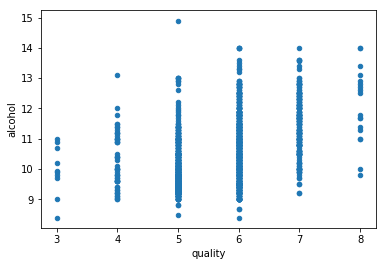

In [31]:
%matplotlib inline
df_wine.plot(kind='scatter', x = 'quality', y = 'alcohol')

# Split, Apply, Combine

In [22]:
def ranker(df_wine):
    df_wine['alc_cont'] = np.arange(len(df_wine) + 1
    return df_wine

SyntaxError: invalid syntax (<ipython-input-22-dd04479c51f0>, line 3)

In [15]:
 df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
